<a href="https://colab.research.google.com/github/Avinash-ml07/Digit-classifier/blob/main/LeNet_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import pad
from tensorflow.keras import layers,models,datasets
import matplotlib.pyplot as plt


In [3]:
(train_images,train_labels),(test_images,test_labels) = datasets.mnist.load_data()
train_images = train_images/255.0
test_images = test_images/255.0
train_images = pad(train_images,[[0,0],[2,2],[2,2]])
test_images = pad(test_images,[[0,0],[2,2],[2,2]])
train_images = tf.expand_dims(train_images,axis=-1)
test_images  = tf.expand_dims(test_images,axis=-1)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
model = models.Sequential([
    layers.Conv2D(6,(5,5),activation='tanh',input_shape=(32,32,1)),
    layers.AveragePooling2D((2,2)),

    layers.Conv2D(16,(5,5),activation='tanh'),
    layers.AveragePooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(120,activation='tanh'),
    layers.Dense(84,activation='tanh'),
    layers.Dense(10,activation='softmax'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
history = model.fit(train_images,train_labels,epochs=10,validation_data=(test_images,test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 55s 26ms/step - accuracy: 0.8801 - loss: 0.4008 - val_accuracy: 0.9698 - val_loss: 0.1011
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9710 - loss: 0.0933 - val_accuracy: 0.9756 - val_loss: 0.0754
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 43s 21ms/step - accuracy: 0.9818 - loss: 0.0590 - val_accuracy: 0.9804 - val_loss: 0.0598
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9857 - loss: 0.0455 - val_accuracy: 0.9810 - val_loss: 0.0597
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 44s 22ms/step - accuracy: 0.9892 - loss: 0.0337 - val_accuracy: 0.9835 - val_loss: 0.0506
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 20ms/step - accuracy: 0.9916 - loss: 0.0271 - val_accuracy: 0.9855 - val_loss: 0.0443
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9925 - loss: 0.0236 - val_accuracy: 0.9841 - val_loss: 0.0494
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 21ms/step - accuracy: 0.9937 -

In [6]:
test_loss,test_accuracy = model.evaluate(test_images,test_labels,verbose=2)
print(f"test accuracy : { test_accuracy * 100:.2f}%")

313/313 - 2s - 8ms/step - accuracy: 0.9848 - loss: 0.0535
test accuracy : 98.48%


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


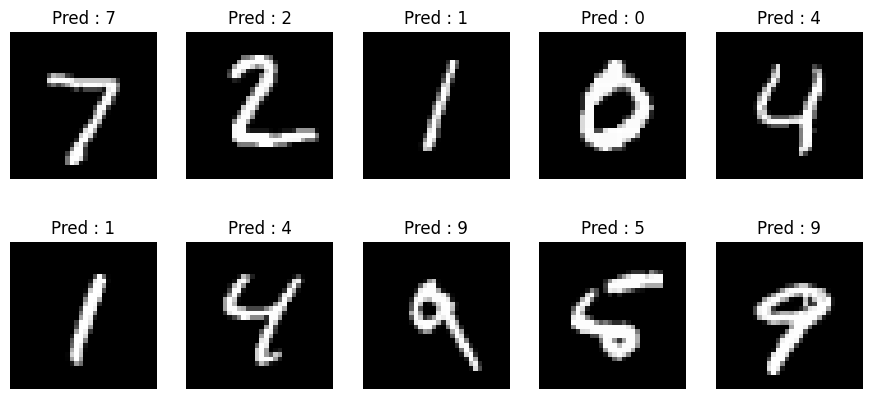

In [7]:
predictions = model.predict(test_images)
plt.figure(figsize=(11,5))
for i in range(10):
  plt.subplot(2,5,i+1)
  plt.imshow(test_images[i].numpy().squeeze(),cmap='gray')
  plt.title(f"Pred : {tf.argmax(predictions[i])}")
  plt.axis("OFF")
plt.show()

